In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/Train-Set_big mart.csv")

In [ ]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
count=df["ProductType"].value_counts()
count

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: ProductType, dtype: int64

In [ ]:
count=df["ProductType"].value_counts()
count

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: ProductType, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [ ]:
# mean value of "Item_Weight" column
df['Weight'].mean()

12.857645184135976

In [ ]:
# filling the missing values in "Item_weight column" with "Mean" value
df['Weight'].fillna(df['Weight'].mean(), inplace=True)

In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df.pivot_table(values='OutletSize', columns='OutletType', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_Outlet_size)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [ ]:
miss_values = df['OutletSize'].isnull()   

In [ ]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: OutletSize, Length: 8523, dtype: bool


In [ ]:
df.loc[miss_values, 'OutletSize'] = df.loc[miss_values,'OutletType'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [ ]:
df.drop_duplicates()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#visuability

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


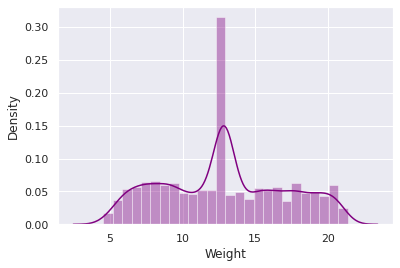

In [ ]:
# Item_Weight distribution
#plt.figure(figsize=(5,5))
sns.set()
sns.distplot(df['Weight'], color='purple')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


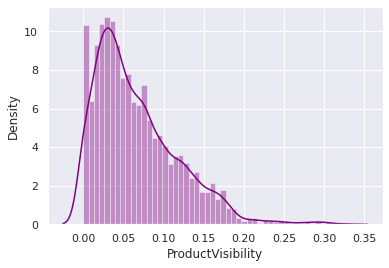

In [ ]:
# Item Visibility distribution
#plt.figure(figsize=(5,5))
sns.distplot(df['ProductVisibility'], color='purple')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


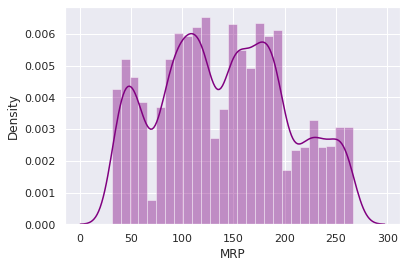

In [ ]:
# Item MRP distribution
#plt.figure(figsize=(5,5))
sns.distplot(df['MRP'], color='purple')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


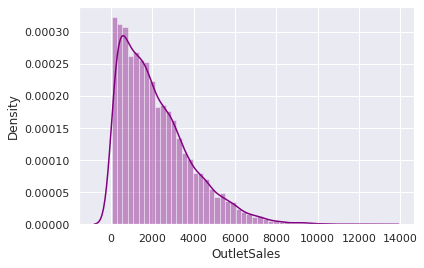

In [ ]:
# Item_Outlet_Sales distribution
#plt.figure(figsize=(5,5))
sns.distplot(df['OutletSales'], color='purple')
plt.show()

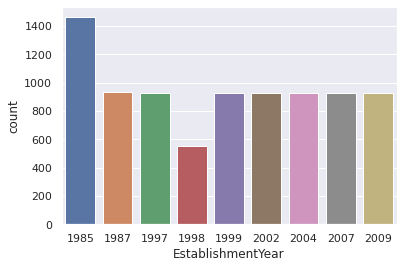

In [ ]:
# Outlet_Establishment_Year column
#plt.figure(figsize=(5,5))
sns.countplot(x='EstablishmentYear', data=df)
plt.show()

In [ ]:
df.replace({'FatContent': {'Low Fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

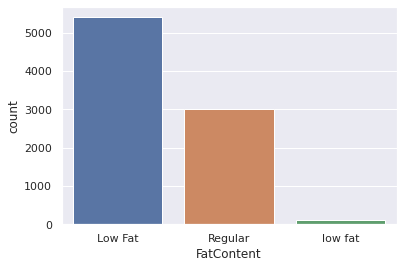

In [ ]:
# Item_Fat_Content column
#plt.figure(figsize=(5,5))
sns.countplot(x='FatContent', data=df)
plt.show()

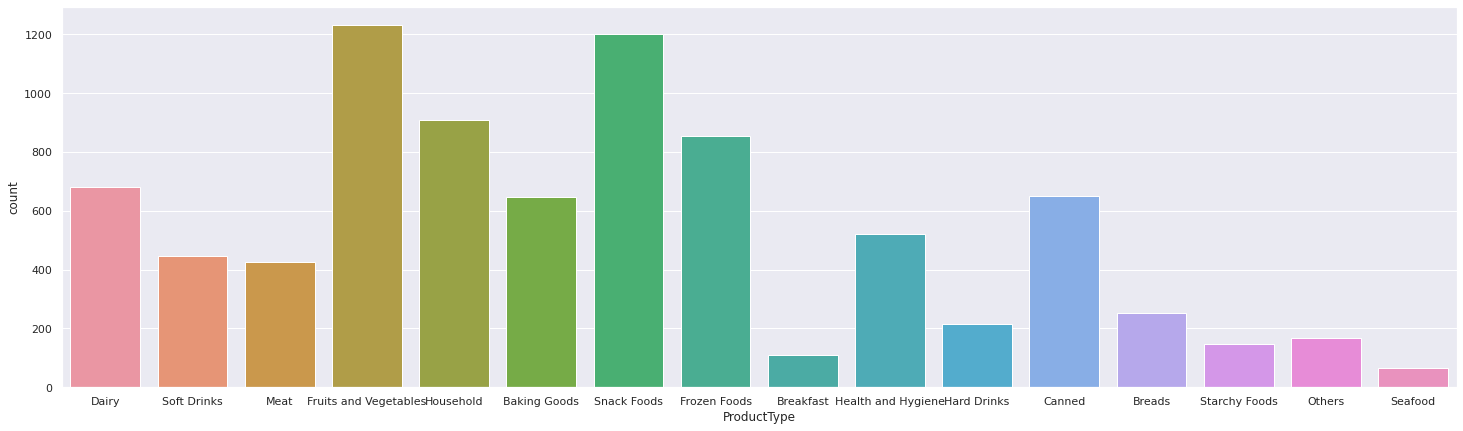

In [ ]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='ProductType', data=df)
plt.show()

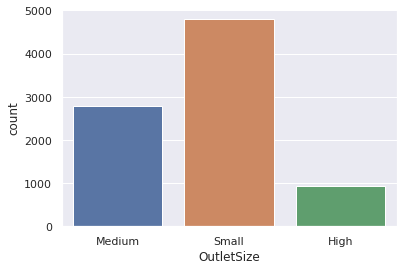

In [ ]:
# Outlet_Size column
#plt.figure(figsize=(5,5))
sns.countplot(x='OutletSize', data=df)
plt.show()

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['FatContent'] = le.fit_transform(df['FatContent'])
df['ProductID'] = le.fit_transform(df['ProductID'])
df['ProductVisibility'] = le.fit_transform(df['ProductVisibility'])
df['OutletSize'] = le.fit_transform(df['OutletSize'])

df['LocationType'] = le.fit_transform(df['LocationType'])
df['OutletType']=le.fit_transform(df['OutletType'])
df['OutletID']=le.fit_transform(df['OutletID'])





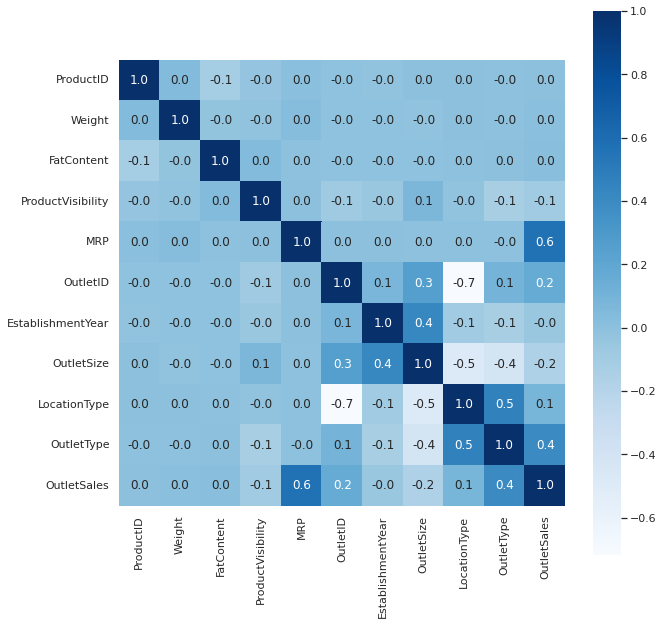

In [ ]:
correlation = df.corr()
correlation
from sklearn import metrics
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Blues')

In [ ]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,664,Dairy,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,880,Soft Drinks,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,715,Meat,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0,Fruits and Vegetables,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0,Household,53.8614,1,1987,0,2,1,994.7052


#minmax

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['FatContent'] = le.fit_transform(df['FatContent'])
df['ProductID'] = le.fit_transform(df['ProductID'])
df['ProductVisibility'] = le.fit_transform(df['ProductVisibility'])
df['OutletSize'] = le.fit_transform(df['OutletSize'])

df['LocationType'] = le.fit_transform(df['LocationType'])
df['OutletType']=le.fit_transform(df['OutletType'])
df['OutletID']=le.fit_transform(df['OutletID'])
df['ProductType']=le.fit_transform(df['ProductType'])

In [ ]:
feature_attribute = ['MRP','FatContent','OutletSales','ProductID','ProductVisibility','Weight','OutletID','EstablishmentYear','OutletSize','LocationType']
target_varible = ['ProductType']
x = df[feature_attribute]
y = df[target_varible]

In [ ]:
x.shape

(8523, 10)

In [ ]:
y.shape

(8523, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normaliz = MinMaxScaler(feature_range=(0,1)) 

In [ ]:
x_normalize = normaliz.fit_transform(x)

In [ ]:
x_normalize 

array([[0.92750715, 0.        , 0.28358666, ..., 0.58333333, 0.5       ,
        0.        ],
       [0.0720684 , 0.5       , 0.03141895, ..., 1.        , 0.5       ,
        1.        ],
       [0.46828841, 0.        , 0.15811486, ..., 0.58333333, 0.5       ,
        0.        ],
       ...,
       [0.22849221, 0.        , 0.08885035, ..., 0.79166667, 1.        ,
        0.5       ],
       [0.30493925, 0.5       , 0.13883505, ..., 1.        , 0.5       ,
        1.        ],
       [0.18750976, 0.        , 0.05610527, ..., 0.5       , 1.        ,
        0.        ]])

#standarization

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
stand = preprocessing.StandardScaler()

In [ ]:
x_stand = stand.fit_transform(x)

In [ ]:
x_stand 

array([[ 1.74745381, -0.74090477,  0.910601  , ...,  0.13954076,
        -0.66408049, -1.36933384],
       [-1.48902325,  1.21412042, -1.01844035, ...,  1.33410274,
        -0.66408049,  1.09156913],
       [ 0.01004021, -0.74090477, -0.04923754, ...,  0.13954076,
        -0.66408049, -1.36933384],
       ...,
       [-0.89720755, -0.74090477, -0.57909963, ...,  0.73682175,
         0.79995418, -0.13888236],
       [-0.60797692,  1.21412042, -0.19672492, ...,  1.33410274,
        -0.66408049,  1.09156913],
       [-1.05226104, -0.74090477, -0.82959407, ..., -0.09937163,
         0.79995418, -1.36933384]])

#decision tree

In [ ]:
feature_attribute = ['MRP','FatContent','OutletSales','ProductID','ProductVisibility','Weight','OutletID','EstablishmentYear','OutletSize','LocationType']
target_varible = ['ProductType']
x = df[feature_attribute]
y = df[target_varible]

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d1 = DecisionTreeClassifier()
d1.fit(x_train,y_train)
p1= d1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_1 = accuracy_score(y_test,p1) * 100
accuracy_1

80.66635382449554

#random forest

In [ ]:
feature_attribute = ['MRP','FatContent','OutletSales','ProductID','ProductVisibility','Weight','OutletID','EstablishmentYear','OutletSize','LocationType']
target_varible = ['ProductType']
x = df[feature_attribute]
y = df[target_varible]

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
d2 = RandomForestClassifier()
d2.fit(x_train,y_train)
p2 = d2.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_2 = accuracy_score(y_test,p2) * 100
accuracy_2

80.24401689347724

#selectkbest

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['FatContent'] = le.fit_transform(df['FatContent'])
df['ProductID'] = le.fit_transform(df['ProductID'])
df['OutletSize'] = le.fit_transform(df['OutletSize'])

df['LocationType'] = le.fit_transform(df['LocationType'])
df['OutletType']=le.fit_transform(df['OutletType'])
df['OutletID']=le.fit_transform(df['OutletID'])
df['ProductType']=le.fit_transform(df['ProductType'])

In [ ]:
z=df.loc[:,["ProductType"]]
z

,ProductType
0,4
1,14
2,10
3,6
4,9
...,...
8518,13
8519,0
8520,8
8521,13


In [ ]:
w=df.loc[:,["ProductID","Weight","FatContent","ProductVisibility","MRP","OutletID","EstablishmentYear","OutletSize","LocationType","OutletType","OutletSales"]]
w

,ProductID,Weight,FatContent,ProductVisibility,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.300,0,664,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,880,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,715,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,3912,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,3278,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,2302,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,7175,103.1332,3,2009,1,2,2,1845.5976


In [ ]:
from sklearn.feature_selection import SelectKBest 

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
f=SelectKBest(score_func=f_classif)

In [ ]:
f.fit(w,z)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest()

In [ ]:
score=pd.DataFrame(f.scores_,columns=['score_value'])
score

,score_value
0,947.124310
1,7.533701
2,94.418269
3,6.047234
4,7.161793
5,0.351318
6,0.408200
7,0.290932
8,0.406854
9,0.385749


In [ ]:
name=pd.DataFrame(w.columns)

In [ ]:
top_feature=pd.concat([name,score],axis=1)

In [ ]:
top_feature

,0,score_value
0,ProductID,947.124310
1,Weight,7.533701
2,FatContent,94.418269
3,ProductVisibility,6.047234
4,MRP,7.161793
5,OutletID,0.351318
6,EstablishmentYear,0.408200
7,OutletSize,0.290932
8,LocationType,0.406854
9,OutletType,0.385749


In [ ]:
top_feature.nlargest(10,'score_value')

,0,score_value
0,ProductID,947.124310
2,FatContent,94.418269
1,Weight,7.533701
4,MRP,7.161793
3,ProductVisibility,6.047234
10,OutletSales,2.700653
6,EstablishmentYear,0.408200
8,LocationType,0.406854
9,OutletType,0.385749
5,OutletID,0.351318


#kmeans

kmeans for Outletsales

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['ProductType']=le.fit_transform(df['ProductType'])


In [ ]:
df.head(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,664,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,880,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,715,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
x=df.loc[:,['OutletSales','ProductType']].values
x

array([[3735.138 ,    4.    ],
       [ 443.4228,   14.    ],
       [2097.27  ,   10.    ],
       ...,
       [1193.1136,    8.    ],
       [1845.5976,   13.    ],
       [ 765.67  ,   14.    ]])

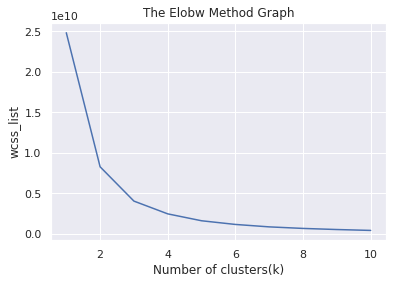

In [ ]:
from sklearn.cluster import KMeans  

wcss_list= [] 

for i in range(1, 11):  #1-10 cluster analysis
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  

# showing plot to choose best k value.
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
#predict the K-means model
y_predict= kmeans.fit_predict(x)
#show the result 
print(y_predict)

[2 0 2 ... 0 0 0]


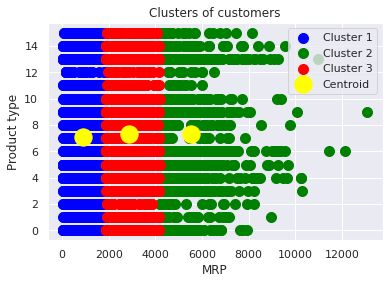

In [ ]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('MRP')  
plt.ylabel('Product type')  
plt.legend()  
plt.show() 

#kmeans for product id

In [ ]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,664,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,880,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,715,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
x=df.loc[:,['ProductID','ProductType']].values
x

array([[ 156,    4],
       [   8,   14],
       [ 662,   10],
       ...,
       [1357,    8],
       [ 681,   13],
       [  50,   14]])

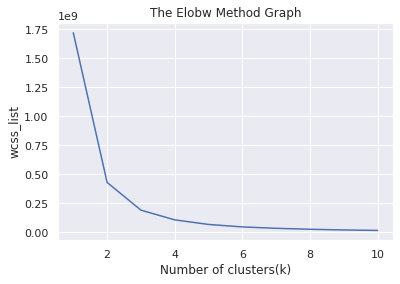

In [ ]:
from sklearn.cluster import KMeans  

wcss_list= [] 

for i in range(1, 11):  #1-10 cluster analysis
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  

# showing plot to choose best k value.
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
#predict the K-means model
y_predict= kmeans.fit_predict(x)
#show the result 
print(y_predict)

[3 3 1 ... 0 1 3]


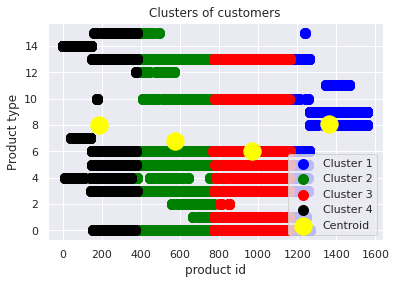

In [ ]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict== 3, 0], x[y_predict == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('product id')  
plt.ylabel('Product type')  
plt.legend()  
plt.show() 

#k means for FatContent

In [ ]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,664,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,880,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,715,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
x=df.loc[:,['FatContent','ProductType']].values
x

array([[ 0,  4],
       [ 1, 14],
       [ 0, 10],
       ...,
       [ 0,  8],
       [ 1, 13],
       [ 0, 14]])

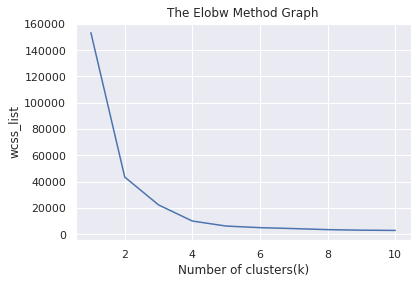

In [ ]:
from sklearn.cluster import KMeans  

wcss_list= [] 

for i in range(1, 11):  #1-10 cluster analysis
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  

# showing plot to choose best k value.
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
#predict the K-means model
y_predict= kmeans.fit_predict(x)
#show the result 
print(y_predict)

[1 0 0 ... 0 0 0]


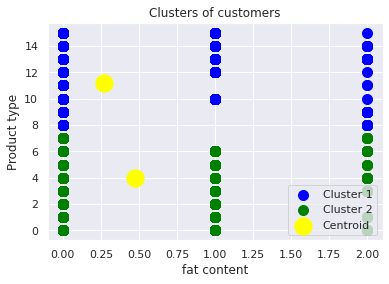

In [ ]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('fat content')  
plt.ylabel('Product type')  
plt.legend()  
plt.show() 